In [1]:
import pandas as pd
data = pd.read_csv('pd_speech_features.csv',header=1)
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns = ['class','id']), data['class'], test_size=0.30)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

# Decission Tree

In [15]:
from sklearn import tree
clf6 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=8)
clf6.fit(x_train, y_train)
clf6.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [16]:
clf6.get_depth()

8

In [17]:
from sklearn import metrics
print(metrics.classification_report(y_train, clf6.predict(x_train)))

y_predict = clf6.predict(x_test)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       123
           1       0.97      1.00      0.98       406

    accuracy                           0.97       529
   macro avg       0.98      0.94      0.96       529
weighted avg       0.97      0.97      0.97       529

              precision    recall  f1-score   support

           0       0.71      0.51      0.59        69
           1       0.81      0.91      0.86       158

    accuracy                           0.79       227
   macro avg       0.76      0.71      0.73       227
weighted avg       0.78      0.79      0.78       227

[[ 35  34]
 [ 14 144]]


# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf7 = RandomForestClassifier(criterion='entropy')
clf7.fit(x_train, y_train)
clf7.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
print(metrics.classification_report(y_train, clf7.predict(x_train)))

y_predict = clf7.predict(x_test)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       406

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529

              precision    recall  f1-score   support

           0       0.87      0.49      0.63        69
           1       0.81      0.97      0.88       158

    accuracy                           0.82       227
   macro avg       0.84      0.73      0.76       227
weighted avg       0.83      0.82      0.81       227

[[ 34  35]
 [  5 153]]


# XGBoost

In [26]:
import xgboost as xgb
clf8 = xgb.XGBClassifier()
clf8.fit(x_train, y_train)
clf8.get_params()

[16:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [27]:
print(metrics.classification_report(y_train, clf8.predict(x_train)))

y_predict = clf8.predict(x_test)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       406

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529

              precision    recall  f1-score   support

           0       0.95      0.59      0.73        69
           1       0.85      0.99      0.91       158

    accuracy                           0.87       227
   macro avg       0.90      0.79      0.82       227
weighted avg       0.88      0.87      0.86       227

[[ 41  28]
 [  2 156]]


# SVM

In [36]:
from sklearn import svm
clf9 = svm.SVC(C=5)
clf9.fit(x_train, y_train)
clf9.get_params()

{'C': 5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [37]:
print(metrics.classification_report(y_train, clf9.predict(x_train)))

y_predict = clf9.predict(x_test)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       123
           1       1.00      1.00      1.00       406

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529

              precision    recall  f1-score   support

           0       0.90      0.52      0.66        69
           1       0.82      0.97      0.89       158

    accuracy                           0.84       227
   macro avg       0.86      0.75      0.78       227
weighted avg       0.85      0.84      0.82       227

[[ 36  33]
 [  4 154]]


# MLP

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

clf1 = MLPClassifier(hidden_layer_sizes=(20,),activation='logistic',max_iter=1000)
clf1.fit(x_train, y_train)
print(metrics.classification_report(y_train, clf1.predict(x_train)))

y_predict = clf1.predict(x_test)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       123
           1       1.00      1.00      1.00       406

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529

              precision    recall  f1-score   support

           0       0.68      0.71      0.70        69
           1       0.87      0.85      0.86       158

    accuracy                           0.81       227
   macro avg       0.78      0.78      0.78       227
weighted avg       0.81      0.81      0.81       227

[[ 49  20]
 [ 23 135]]


In [39]:
clf1.get_params()

{'activation': 'logistic',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (20,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# ELM

In [40]:
from scipy.linalg import pinv2
import numpy as np

In [41]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [42]:
def ELM(x,y,hidden_size=100,f=sigmoid):
    
    input_size = x.shape[1]
    input_weights = np.random.normal(size=[input_size,hidden_size])
    biases = np.random.normal(size=[hidden_size])
    
    output_weights = np.dot(pinv2(hidden_nodes(x,input_weights,biases,f)), y)
    return input_weights,output_weights,biases

In [43]:
def hidden_nodes(x,w1,biases,actfunc=sigmoid):
    G = np.dot(x, w1)
    G = G + biases
    H = actfunc(G)
    return H

In [44]:
def predict(x,w):
    out = hidden_nodes(x,w[0],w[2])
    out = np.dot(out, w[1])
    return np.around(out)

In [45]:
clf2 = ELM(x_train,y_train,35)

In [46]:
train_predict = predict(x_train,clf2)
print(metrics.classification_report(y_train, train_predict))
print(metrics.confusion_matrix(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52       123
           1       0.85      0.92      0.88       406

    accuracy                           0.81       529
   macro avg       0.74      0.68      0.70       529
weighted avg       0.79      0.81      0.80       529

[[ 55  68]
 [ 33 373]]


In [47]:
prediction = predict(x_test,clf2)
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.69      0.45      0.54        69
           1       0.79      0.91      0.85       158

    accuracy                           0.77       227
   macro avg       0.74      0.68      0.70       227
weighted avg       0.76      0.77      0.75       227

[[ 31  38]
 [ 14 144]]


# AutoEncoder

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [49]:
n_inputs = x_train.shape[1]
visible = Input(shape=(n_inputs,))

# encoder level 1
e = Dense(n_inputs)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs/4)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# bottleneck
n_bottleneck = round(float(n_inputs) / 8.0)
bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(n_inputs/4)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# output layer
output = Dense(n_inputs, activation='sigmoid')(d)

In [50]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(loss='mse')
# fit the autoencoder model to reconstruct input
history = model.fit(x_train, x_train, epochs=100,validation_data=(x_test,x_test))

Epoch 1/100
17/17 [==============================] - 1s 33ms/step - loss: 0.9450 - val_loss: 1.6631
Epoch 2/100
17/17 [==============================] - 0s 23ms/step - loss: 0.8204 - val_loss: 1.6176
Epoch 3/100
17/17 [==============================] - 0s 22ms/step - loss: 0.7978 - val_loss: 1.5942
Epoch 4/100
17/17 [==============================] - 0s 22ms/step - loss: 0.7798 - val_loss: 1.5839
Epoch 5/100
17/17 [==============================] - 0s 24ms/step - loss: 0.7790 - val_loss: 1.5766
Epoch 6/100
17/17 [==============================] - 0s 26ms/step - loss: 0.7586 - val_loss: 1.5581
Epoch 7/100
17/17 [==============================] - 0s 26ms/step - loss: 0.7529 - val_loss: 1.5487
Epoch 8/100
17/17 [==============================] - 0s 26ms/step - loss: 0.7438 - val_loss: 1.5433
Epoch 9/100
17/17 [==============================] - 0s 25ms/step - loss: 0.7453 - val_loss: 1.5417
Epoch 10/100
17/17 [==============================] - 0s 25ms/step - loss: 0.7364 - val_loss: 1.5362

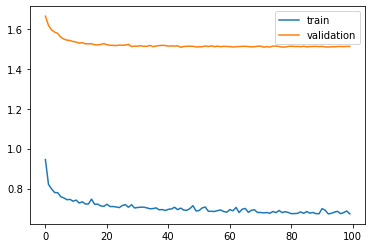

In [51]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)

In [52]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 753)]             0         
_________________________________________________________________
dense (Dense)                (None, 753)               567762    
_________________________________________________________________
batch_normalization (BatchNo (None, 753)               3012      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 753)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 188)               141752    
_________________________________________________________________
batch_normalization_1 (Batch (None, 188)               752       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 188)               0   

In [57]:
x_train_encode.shape

(529, 94)

In [53]:
from sklearn.linear_model import Perceptron

x_train_encode = encoder.predict(x_train)
x_test_encode = encoder.predict(x_test)

clf3 = Perceptron()
clf3.fit(x_train_encode, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
train_predict = clf3.predict(x_train_encode)
print(metrics.classification_report(y_train, train_predict))
print(metrics.confusion_matrix(y_train, train_predict))

prediction = clf3.predict(x_test_encode)
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72       123
           1       0.94      0.86      0.90       406

    accuracy                           0.85       529
   macro avg       0.79      0.84      0.81       529
weighted avg       0.87      0.85      0.86       529

[[101  22]
 [ 56 350]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        69
           1       0.86      0.87      0.87       158

    accuracy                           0.81       227
   macro avg       0.78      0.78      0.78       227
weighted avg       0.81      0.81      0.81       227

[[ 47  22]
 [ 20 138]]


In [55]:
clf4 = MLPClassifier(hidden_layer_sizes=(20,),activation='logistic',max_iter=1000)
clf4.fit(x_train_encode, y_train)
print(metrics.classification_report(y_train, clf4.predict(x_train_encode)))

y_predict = clf4.predict(x_test_encode)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       123
           1       1.00      1.00      1.00       406

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529

              precision    recall  f1-score   support

           0       0.77      0.62      0.69        69
           1       0.85      0.92      0.88       158

    accuracy                           0.83       227
   macro avg       0.81      0.77      0.78       227
weighted avg       0.82      0.83      0.82       227

[[ 43  26]
 [ 13 145]]


In [58]:
clf5 = ELM(x_train_encode,y_train,35)

train_predict = predict(x_train_encode,clf5)
print(metrics.classification_report(y_train, train_predict))
print(metrics.confusion_matrix(y_train, train_predict))

prediction = predict(x_test_encode,clf5)
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.48      0.59       123
           1       0.86      0.96      0.90       406

    accuracy                           0.84       529
   macro avg       0.81      0.72      0.75       529
weighted avg       0.84      0.84      0.83       529

[[ 59  64]
 [ 18 388]]
              precision    recall  f1-score   support

           0       0.60      0.41      0.48        69
           1       0.77      0.88      0.82       158

    accuracy                           0.74       227
   macro avg       0.68      0.64      0.65       227
weighted avg       0.72      0.74      0.72       227

[[ 28  41]
 [ 19 139]]


# 5 Fold Cross Validation Results

In [127]:
from sklearn.model_selection import cross_validate, cross_val_predict
scoring = ['accuracy','recall_weighted','precision_weighted','f1_weighted']

x = data.drop(columns = ['class','id'])
y = data['class']
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))
x_encode = encoder.predict(x)

In [128]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

s2 = {'test_accuracy':[],'test_recall_weighted':[],'test_precision_weighted':[],'test_f1_weighted':[]}
s5 = {'test_accuracy':[],'test_recall_weighted':[],'test_precision_weighted':[],'test_f1_weighted':[]}

for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
    x_train_encode, x_test_encode, y_train_e, y_test_e = train_test_split(x_encode, y, test_size=0.20)
    
    clf2 = ELM(x_train,y_train,35)
    clf5 = ELM(x_train_encode,y_train_e,35)
    
    y_pred2 = predict(x_test,clf2)
    y_pred5 = predict(x_test_encode,clf5)
    
    s2['test_accuracy'].append(accuracy_score(y_test, y_pred2))
    s5['test_accuracy'].append(accuracy_score(y_test_e, y_pred5))
    
    s2['test_recall_weighted'].append(recall_score(y_test, y_pred2, average='weighted'))
    s5['test_recall_weighted'].append(recall_score(y_test_e, y_pred5, average='weighted'))

    s2['test_precision_weighted'].append(precision_score(y_test, y_pred2, average='weighted'))
    s5['test_precision_weighted'].append(precision_score(y_test_e, y_pred5, average='weighted'))
    
    s2['test_f1_weighted'].append(f1_score(y_test, y_pred2, average='weighted'))
    s5['test_f1_weighted'].append(f1_score(y_test_e, y_pred5, average='weighted'))

In [131]:
clf1 = MLPClassifier(hidden_layer_sizes=(20,),activation='logistic',max_iter=1000)
clf3 = Perceptron()
clf4 = MLPClassifier(hidden_layer_sizes=(20,),activation='logistic',max_iter=1000)
clf6 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=8)
clf7 = RandomForestClassifier(criterion='entropy')
clf8 = xgb.XGBClassifier()
clf9 = svm.SVC(C=5)

scores = []
scores.append(cross_validate(clf1, x , y, scoring=scoring, cv=5))
scores.append(s2)
scores.append(cross_validate(clf3, x_encode , y, scoring=scoring, cv=5))
scores.append(cross_validate(clf4, x_encode , y, scoring=scoring, cv=5))
scores.append(s5)
scores.append(cross_validate(clf6, x , y, scoring=scoring, cv=5))
scores.append(cross_validate(clf7, x , y, scoring=scoring, cv=5))
scores.append(cross_validate(clf8, x , y, scoring=scoring, cv=5))
scores.append(cross_validate(clf9, x , y, scoring=scoring, cv=5))

c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimiza

[21:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [132]:
print('test_accuracy')
for s in scores:
    print(np.mean(s['test_accuracy']))
print()
print('test_precision_weighted')
for s in scores:
    print(np.mean(s['test_precision_weighted']))
print()
print('test_recall_weighted')
for s in scores:
    print(np.mean(s['test_recall_weighted']))  
print()
print('test_f1_weighted')
for s in scores:
    print(np.mean(s['test_f1_weighted']))    

test_accuracy
0.7540606483095156
0.781578947368421
0.7699372603694666
0.798963053328686
0.7973684210526315
0.7765249215754618
0.8479086789822239
0.8346897873823631
0.8240937608922969

test_precision_weighted
0.7791295011812378
0.7677275688908338
0.7761171116321852
0.7979132099839698
0.7846570228928094
0.7713207132269432
0.8449532279970411
0.8301780226227973
0.8162207882871284

test_recall_weighted
0.7540606483095156
0.781578947368421
0.7699372603694666
0.798963053328686
0.7973684210526315
0.7765249215754618
0.8479086789822239
0.8346897873823631
0.8240937608922969

test_f1_weighted
0.7614582844083835
0.766387372925174
0.7693356082893057
0.7955953222997698
0.7861275064243317
0.7735328367035613
0.8353708258993015
0.8240332117824863
0.8147115144148211


In [126]:
y_predict = cross_val_predict(clf8, x, y, cv=5)
print(metrics.confusion_matrix(y, y_predict))

c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel